<a href="https://colab.research.google.com/github/Young4424/Machine-Learning-Deep-learning-Myself/blob/main/00_DL_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(
    root = './cache', download = True,
    transform = transforms.Compose([transforms.ToTensor()])
    )

test_dataset = torchvision.datasets.FashionMNIST(
    root = './cache', download = True,
    transform = transforms.Compose([transforms.ToTensor()]),
    train = False)

100%|██████████| 26421880/26421880 [00:01<00:00, 17404308.83it/s]


Extracting ./cache/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./cache/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 311840.04it/s]


Extracting ./cache/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./cache/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5631786.17it/s]


Extracting ./cache/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./cache/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8929808.52it/s]

Extracting ./cache/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./cache/FashionMNIST/raw



In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = 64)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size = 64)

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_map = {i : name for i, name in enumerate(class_names)}
class_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [6]:
label_idx = list(range(0, 10))
label_name = train_dataset.classes
labels_map = dict(zip(label_idx, label_name))

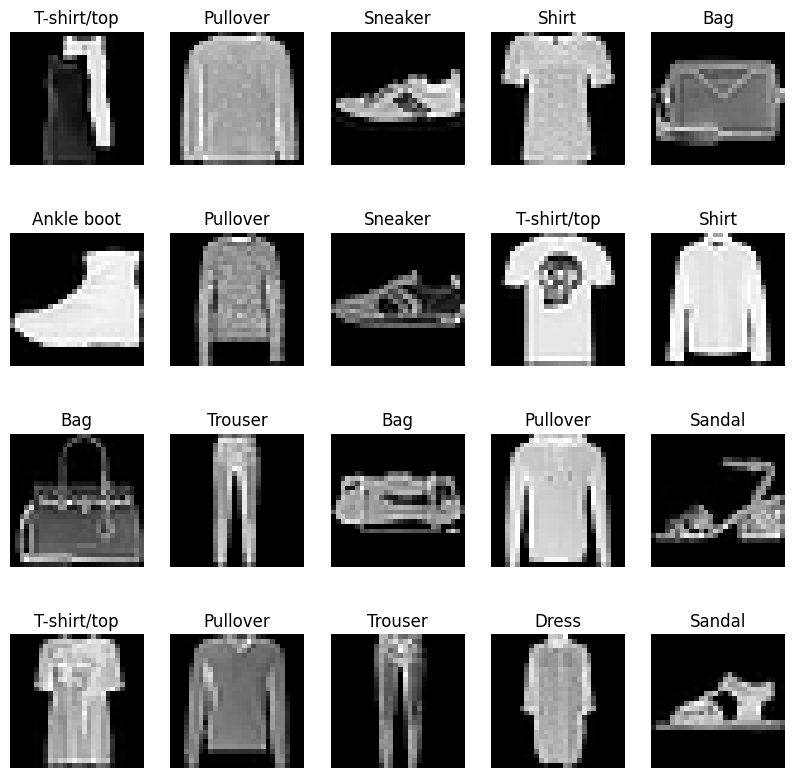

In [8]:
fig = plt.figure(figsize = (10, 10))

for i in range(1, 21):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0, :, :]
    fig.add_subplot(4, 5, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')

plt.show()

In [11]:
class FashionDNN(nn.Module):
  def __init__(self):
    super(FashionDNN, self).__init__() # 기본적으로 이렇게 쓴다
    self.fc1 = nn.Linear(in_features = 28*28, out_features= 256) #fully connected layer, 완전 연결층 , 펼쳐서 내야함
    self.fc2 = nn.Linear(in_features = 256, out_features = 64)
    self.fc3 = nn.Linear(in_features = 64, out_features = 10)

    # 레이어 만들고 연결시켜주기

  def foward(self,input_data):
    out = input_data.view(-1,28*28) # 행이 몇개가 될지 모르므로 -1,
    out = self.fc1(out)
    out = F.sigmoid(out) # activation 함수 지나가기
    out = self.fc2(out)
    out = F.sigmoid(out)
    out = self.fc3(out)
    return out



In [12]:
# 모델 compile 하기 (loss 구하기, w 조정 등등)

lr = 0.001
model = FashionDNN()
model.to(device) # model을 gpu에 올림

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = lr) # gradient decent, 최적화시킬 param을 넣는다.